In [1]:
!pip install pennylane

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.0/930.0 kB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 25.0 MB/s eta 0:00:00


In [2]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

#Parênteses sobre os elementos básico de um código no pennylane

**Função decoradora:**

Uma função decorada é uma função que foi modificada por meio de um decorador. Em Python, um decorador é um padrão de projeto que permite adicionar funcionalidades a uma função ou método existente sem modificar o seu código.

Explicando em partes:
1. **Decorador**: Um decorador é uma função que recebe outra função como entrada e retorna uma nova função, que geralmente envolve algum processamento adicional antes ou depois de chamar a função original.

2. **Função decorada**: É a função original que foi passada ao decorador e que agora possui funcionalidades extras.

Sintaxe de um decorador:

Usa-se o símbolo **@** seguido do nome do decorador antes da definição de uma função. Vejamos o exemplo abaixo:




In [4]:
def meu_decorador(func):
    def wrapper(*args, **kwargs):
        print("Função sendo decorada.")
        resultado = func(*args, **kwargs)
        print("Função foi executada.")
        return resultado
    return wrapper

@meu_decorador
def minha_funcao():
    print("Esta é a função original.")

minha_funcao()


Função sendo decorada.
Esta é a função original.
Função foi executada.


**Explicação do código:**

meu_decorador é o decorador, que recebe uma função (func) como argumento.
Dentro do decorador, é definida uma nova função wrapper que envolve (wraps) a função original func.

O wrapper pode fazer algo antes de chamar func (como imprimir "Função sendo decorada.") e depois de chamar func (como imprimir "Função foi executada.").

Ao aplicar @meu_decorador em minha_funcao, a função minha_funcao é automaticamente passada como argumento para o decorador meu_decorador. Isso transforma minha_funcao em uma função decorada que inclui o comportamento do wrapper.

Por que usar decoradores?

Decoradores são úteis para:



*   Adicionar comportamentos: Como logging, validação de permissões, contagem de execuções, etc.
*   Reutilização de código: Facilita a adição de funcionalidades sem modificar a lógica principal da função.Item da lista
*   Separação de responsabilidades: Mantém o código mais organizado e modular.

Relacionando com PennyLane

No caso do PennyLane, o decorador

```
@qml.qnode(dev)
```

 serve para transformar a função definida (meu_circuito) em um circuito quântico que pode ser executado em um dispositivo (simulado ou real). O decorador realiza configurações internas para gerenciar a execução e medição do circuito.

 EXEMPLO:

In [6]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def superposicao():
  qml.Hadamard(wires=0)
  return qml.probs(wires=0)



y = superposicao()

print(y)

[0.5 0.5]


EXERCICIOS:

1. Explique cada linha do código acima

**Lidando com múltiplos qubits**

Considere um circuito quântico com dois qubits, uma posta de Hadamard (H) para ao qubit $|0>$ (primeiro qubit) e uma porta PauliZ (Z) para o qubit $|1>$ (segundo qubit). Como escrever os estados finais?


|\psi>

$\hspace{2cm} H\otimes Z \times |0>\otimes |1>  =  \frac{1}{\sqrt(2)}(|01> + |11>) \hspace{2cm}    (2)\\[1cm]$

Agora, vamos testar!

[0.  0.5 0.  0.5]


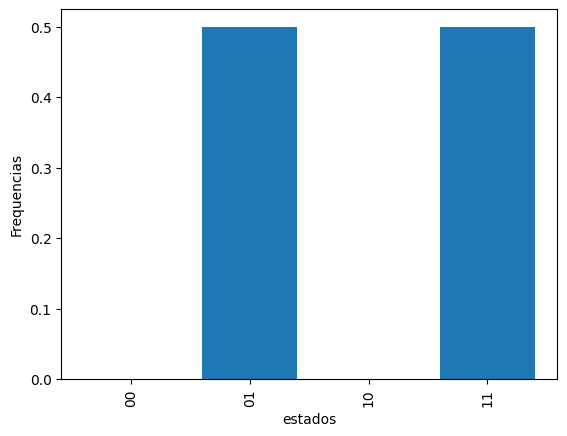

In [16]:
dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def superposicao():
  qml.Hadamard(wires=0)
  qml.PauliX(wires=1)
  qml.PauliZ(wires=1)
  return qml.probs(wires=[0,1])

y = superposicao()

print(y)

x =['00','01','10','11']
plt.bar(x,y)
plt.xticks(rotation = 90)
plt.xlabel("estados")
plt.ylabel("Frequencias")
plt.show()

EXERCICIO
0. Por que foi inserida uma porta PauliX no circuito?
1. Faça os cálculos trocando a posição das portas H e Z e verifique o resultado:

$\hspace{2cm} Z\otimes H \times |0>\otimes |1>  = \frac{1}{\sqrt{2}}(|00> - |01>) \hspace{2cm}    (2)\\[1cm]$
2. Refaça o circuito acima e valide seu resultado.

In [ ]:
#Escreva e rode seu código de validação aqui!

#Cuidado com as ordens de significância dos qubits (cima para baixo ou baixo para cima) para saber a ordem dos produtos tensoriais!

**qubit e esfera de Bloch**

Um qubit representa um estado físico de alguma propriendade (spin, energia, momento angular etc) de um objeto físico como um elétron, fóton, íon etc. Na sua forma mais geral, um qubit é dado por:

$ \hspace{2cm} |\psi> = \alpha|0>+\beta|1>  \hspace{2cm}$     ()

Lembrando que $\alpha$ e $\beta$ são números complexos, podem ser escritos na forma polar como:

$ \hspace{2cm} \alpha = r_{1}e^{\phi_{1}}$ e $\beta = r_{2}e^{\phi_{2}} \hspace{2cm}$

substituindo na eq. (), temos:

$ \hspace{2cm} |\psi> = r_{1}e^{\phi_{1}}|0>+r_{2}e^{\phi_{2}} \beta|1>  \hspace{2cm}$

Multiplicando os dois lados da eq. () por $e^{-\phi_{1}}$ ficamos com:

$ \hspace{2cm} e^{-\phi_{1}}|\psi> = r_{1}|0>+r_{2}e^{\phi_{2}-\phi_{1}}|1>  \hspace{2cm}$


O módulo de $|\psi>$ é $<\psi|\psi>$ deve ser igual a 1 porque o estado $|\psi>$ é normalizado. Também o módulo de $e^{-\phi_{1}}|\psi>$ deve ser normalizo, logo deve ser igual a $<\psi|\psi> = 1$. Sabemos que,

$\hspace{2cm} |\alpha|^{2} + |\beta|^{2} = 1 \hspace{2cm}$

Poranto,

$ \hspace{2cm}  r_{1}*r_{1}e^{-\phi_{1}}*e^{\phi_{1}} +r_{2}*r_{2}e^{-\phi_{2}}*e^{-\phi_{2}}$

Logo,

$\hspace{2cm} r_{1}^{2} + r_{2}^{2} = 1  \hspace{2cm}$

ou $\hspace{2cm} cos^{2}(\frac{\theta}{2}) + sen^{2}(\frac{\theta}{2}) = 1  \hspace{2cm}$

Então,

$ \hspace{2cm} |\psi> = cos^{2}(\frac{\theta}{2})|0>+e^{\phi}sen^{2}(\frac{\theta}{2})|1>  \hspace{2cm}$,

onde  $\phi = \phi_{2} - \phi_{1}$.

Observe que a fase $e^{-\phi_{1}}$ é arbitrária e pode ser considerada igua a 1, pois isso, não afeta o módulo de $|\psi>$.


A notação geral acima é muito importante porque nos diz que um qubit depende apneas de um ângulo $\theta$ e um ângulo $\phi$. Isto é, o qubit é um vetor que vive numa esfera de raio igual a $<\psi|\psi> = 1$ e pode girar em torno de dois eixos. Essa esfera é conhecida como espera de Bloch e tudo o que fazemos com o qubit é mudar sua posição na esfera por meio de portas lógicas quânticas.


**Operadores Unitários (portas lógicas quânticas)**

Os operadores unitários ($U$) são matrizes com as seguintes propriedades:

1. a matrix $U$ deve ser quadrada (num. de linhas = num. de colunas)
2. todos os elemento da matriz $U$ são números complexos
3. existe o conjudado complexo transposto da matriz $U$, que simbolizamos por $U^{\dagger}$
4. o produto $UU^{\dagger}$ ou $U^{\dagger}U$ deve ser identicamente igual a matriz identidade $I$
5. ao ser aplicada sobre um qubit ($U|\psi>=|\phi>$), cria um novo estado $|\phi>$, que já nasce normalizado.


Os operadores unitários descrever a evolução temporal de um qubit num sistema físico eles podem girar os qubits na esfera de Bloch para produzir computação.

A forma geral de operador unitário é dada por:


$$U(\theta,\phi,\lambda) = \left [\begin{array}{cccc}
  cos(\frac{\theta}{2})&-e^{i\lambda}sen(\frac{\theta}{2}) \\
  e^{i\phi}sen(\frac{\theta}{2})&e^{i(\phi+\lambda)}cos(\frac{\theta}{2}) \\
\end{array}\right ]$$

O ângulo
Com a matriz acima, podemos criar todas as portas lógicas quânticas que desejarmos. Por exempo, para $\theta=\pi$, $\lambda= 3\pi/2$  e $\phi=0$ temos:


$$U(\theta,\phi,\lambda) = \left [\begin{array}{cccc}
  0&1 \\
  1&0 \\
\end{array}\right ] = X$$


https://bloch.kherb.io/


EXERCICIOS: Quais os valores de $\theta=?$, $\lambda= ?\pi/2$  e $\phi=?$ para criar uma porta quântica:

1. Z
2. Y
3. H
4. RX

#Introdução

Na computação clássica, estudamos os problemas e a solução, em geral, surge por meio de um algortmo computacional, que nada mais é do que uma lista de passos para resolver o problema. Na computação quântica, a ideia é a mesma; porém, a lógica para construção de algoritmos é diferente já que os computadores quânticos utilizam as propriedades dos fenômenos físicos quânticos para produzir a acomputação. Desse modo é necessário ter pouco de conhecimento da matemática e da física quântica para criar algoritmos quânticos úteis.

Algumas propriedades quânticas como a superposição de estados e o entrelaçamento são consideradas o coração de um sistema quântico como um computador quântico e devemos utilizá-las na construção de nossos algoritmos quânticos.


#0.Superposição

Um sistema quântico pode ser composto por apenas um único elétron onde, sua energia, momentum, spin ou momento angular são propriedades do elétron e, cada uma delas, poderia ser utilizada como um qubit ou um estado do sistema. O spin do elétron pode estar em um de dois estados possíveis: up (para cima - $|0>$) ou down (para baixo- $|1>$). Todavia, no mundo quântico, o elétron pode estar nos DOIS estados ao mesmo tempo, formando uma combinação linear dada por por um novo estado, de superposição:
$ \hspace{2cm} |\psi> = \alpha|0>+\beta|1>  \hspace{2cm}   (1)\\[1cm]$

O estado apresentado na eq. (1) representa o qubit. Enquanto não medimos o spin, o eletron existem nos dois estados (up e down) ao mesmo tempo. Ao realizarmo uma medida poderemos obter o valor 0 ou o valor 1. Se repetirmos muitas vezes a mesma medida, teremos uma distribuição de frequências de 0 e 1. Aprobabilidade de encontrarmos o spin no estado $|0>$ é dada por $|\alpha|^{2}$ e a probabilidade de encontrar o spin no estado $|1>$ é dada por $|\beta|^{2}$, tal que:

$\hspace{2cm} |\alpha|^{2} + |\beta|^{2} = 1 \hspace{2cm}    (2)\\[1cm]$

Podemo fazer a superposição de n qubits utilizando n portas de Hadamard, uma para cada qubit:

$\hspace{2cm}H|0>=\frac{1}{\sqrt{2}}(|0>+|1>)\\[1cm]$

$\hspace{2cm}H\otimes H|0>=\frac{1}{\sqrt{2}}(|0>+|1>)\otimes \frac{1}{\sqrt{2}}(|0>+|1>) = \frac{1}{2}(|00>+|01>+|10>+|11>)\\[1cm]$

Ou de modo geral, para n qubits:

$ \hspace{2cm} H^{\otimes n}|0>=\frac{1}{\sqrt{2^{n}}}\sum_{\vec{x}\in\{0,1\}^{n}}|\vec{x}>\\[1cm]$

Onde, $\{0,1\}^{1}=\{0,1\}$ ou  $\{0,1\}^{2}=\{00,01,10,11\}\\[1cm]$

Agora, vamos construir um algoritmo que realiza a superposição de n qubits!









Cirucuito: 

0: ──H─┤ ╭Probs
1: ──H─┤ ╰Probs

 Medidas: 



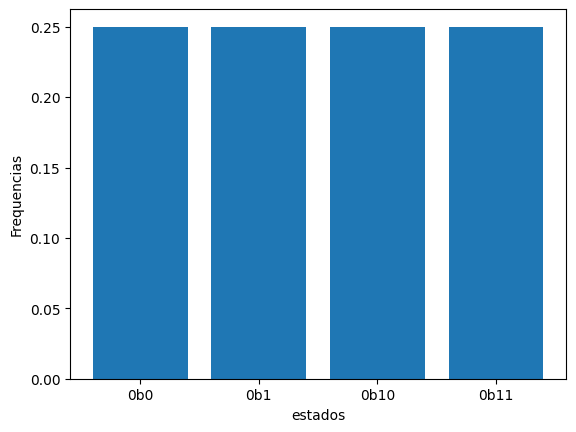

In [3]:
#----- Algoritmo quântico para superposição de n qubits -----

n_qubits = 2

dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev)
def superposicao(n_qubits):
  for i in range(n_qubits):
    qml.Hadamard(wires=i)
  return qml.probs(wires=range(n_qubits))



y = superposicao(n_qubits)
x = [str(bin(i)) for i in range(2**n_qubits)]




#----- circuito -----

dw = qml.draw(superposicao)

#----- distribuição de estados ----
print("Cirucuito: \n")
print(dw(n_qubits))

print("\n Medidas: \n")
plt.bar(x,y)
plt.xlabel("estados")
plt.ylabel("Frequencias")
plt.show()

#Exercicios
1. Qual o significado do grafico acima?
2. Quantos estados são possiveis com 1, com 3 e com 4 qubits?
3. No caso de um cadeado binário com 3 dígitos, a superposição pode gerar o segredo para abrir o cadeado?
4. No caso de a resposta da questão 3 for afirmativa, como saber quais dos estados medidos é a senha do cadeado?  

#Gerador de Número Aleatório Quântico

A simulação computacional de processos é uma área que vem crescendo a cada dia, ela pode ser útil para:

* prever uma situação futura dependendo de um cenário;
* prever uma situação passada;
* estudar a causa de um fenômeno;
* reduzir custos em ensaios destrutivos;
* mitigar riscos em ensaios não destrutivos.

A simulação computacional é utilizada em todos os ramos da Indútria, Saúde e Medicina, Desenvolvimento de novas materiais, métodos etc. Para realizar uma simulação computacional é necessário criar um modelo matemático do problema que deseja solucionar e, em seguida, validar o modelo com dados reais. Após a avlidação, o modelo pode ser utilizado para realizar simulações. Todavia, a acurácia e precisão dos resultados da simulação está fortemente relacionadas com o a qualidade do gerador de números aletórios (GNA). \\

Como sabemos, um computador clássico não pode gerar um número aleatório puro por que é um autômato linear e isso implica que um algoritmo de geração de números aletórios deve ser recursivo, isto é, o próximo número gerado depende no valor anterior. Então dizemos que um computador só consegue gerar números pseudo-aleatórios e isso é um problema já que na antureza os fenômenos sçao verdadeiramente aleatórios. \\

A boa notícia é que podemos gerara números aleatórios verdadeiros utilizando um comptador quântico. Isso é possível porque um computador quântico utiliza as propriedades físicas quânticas da matéria para realizar a computação. Como um primeiro experimento, vamos criar um Gerador de Números Aletórios Quânticos (Quantum Random Number Generator - QRNG) e em seguida vamos aplicá-lo num algoritmo de criptografia RSA.






#1. Criptografia quase quântica

A ideia aqui e construir um QRNG que sirva como gerador aletário para um algoritmo de criptografia RSA. Vamos fazer esse experimento em das fases:
 ConstruO algoritmo abaixo gera números aleatórios verdadeiros se você


1.   Construção do algoritmo que gera números aleatórios verdadeiros
2.   Aplicação no algoritmo de criptografia RSA







```
import random
from sympy import isprime, mod_inverse

def generate_prime_candidate(length):
    """Gera um candidato a primo de um determinado comprimento."""
    p = 0
    while not isprime(p):
        p = random.getrandbits(length)
    return p

def generate_prime_number(length):
    """Gera um número primo de um determinado comprimento."""
    p = generate_prime_candidate(length)
    return p

def generate_keypair(bits):
    """Gera um par de chaves RSA públicas e privadas."""
    p = generate_prime_number(bits)
    q = generate_prime_number(bits)
    
    while p == q:
        q = generate_prime_number(bits)

    n = p * q
    phi = (p - 1) * (q - 1)

    e = 65537  # Um valor comum para e
    d = mod_inverse(e, phi)

    return ((e, n), (d, n))  # (chave pública, chave privada)

def encrypt(public_key, plaintext):
    """Criptografa uma mensagem usando a chave pública."""
    e, n = public_key
    ciphertext = [pow(ord(char), e, n) for char in plaintext]
    return ciphertext

def decrypt(private_key, ciphertext):
    """Descriptografa uma mensagem usando a chave privada."""
    d, n = private_key
    plaintext = ''.join([chr(pow(char, d, n)) for char in ciphertext])
    return plaintext

# Exemplo de uso
if __name__ == "__main__":
    bits = 8  # Para simplificação; use 1024 ou mais para segurança real
    public_key, private_key = generate_keypair(bits)

    message = "Olá Mundo Quantico!"
    print(f"Mensagem original: {message}")

    encrypted_msg = encrypt(public_key, message)
    print(f"Mensagem criptografada: {encrypted_msg}")

    decrypted_msg = decrypt(private_key, encrypted_msg)
    print(f"Mensagem descriptografada: {decrypted_msg}")
```



#1.1 QRNG

Cirucuito: 

0: ──H─┤ ╭Probs
1: ──H─┤ ╰Probs
Medidas: 



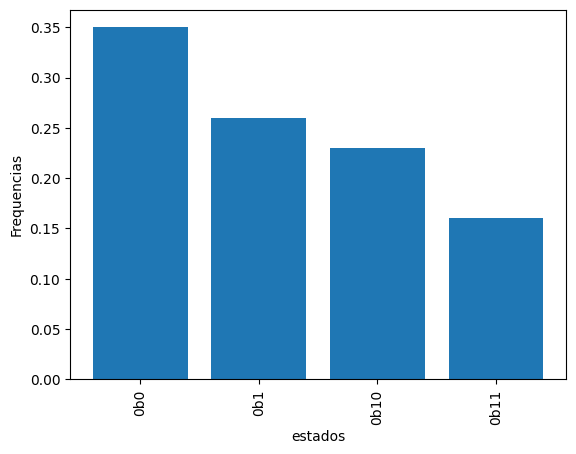

In [15]:
n_qubits = 2
n_shots = 100

dev = qml.device("default.qubit", wires=n_qubits,shots=n_shots)

@qml.qnode(dev)
def superposicao(n_qubits):
  for i in range(n_qubits):
    qml.Hadamard(wires=i)
  return qml.probs(wires=range(n_qubits))



y = superposicao(n_qubits)
x = [str(bin(i)) for i in range(2**n_qubits)]

#----- desenha circuito -----

dw = qml.draw(superposicao)

#----- distribuição de estados ----
print("Cirucuito: \n")
print(dw(n_qubits))

print("Medidas: \n")
plt.bar(x,y)
plt.xticks(rotation = 90)
plt.xlabel("estados")
plt.ylabel("Frequencias")
plt.show()

1. Rode 3 vezes o código acima observando o resultado no gráfico acima
2. Qual o sginificado do gráfico?
3. Acrescente um trrecho de código para pegar a medida mais próvável.
4. Utilize os resultados do item 3. e aplique-os no lagortimo de criptografia mostrado na seção Criptografia Quase Quântica. Escreva e teste sua criptografia no trecho de código abaixo:

In [ ]:
#Escreve seu algoritmo RSA quase Quântico aqui!

5. (Reflexão) Como lidar com uma computação aleatória, isto é, não determinística?

#2. Oráculos

Na Grécia antiga, os oráculos eram instituições religiosas e locais sagrados onde as pessoas buscavam respostas de deuses sobre questões importantes da vida, como decisões pessoais, guerras e questões políticas. O mais famoso deles era o Oráculo de Delfos, onde a Pítia, uma sacerdotisa, entrava em transe e proferia profecias que eram interpretadas pelos sacerdotes. \\

Na computação quântica também utilizamos um tipo de oráculo quântico quando queremos encontrar uma medida específica dentro de um conjunto de n medidas. Considere os resultados de uma medida para um circuito de 2 qubits. As possiveis medidas retornarão os  resultados: 00, 01, 10 e 11. Agora, considere que o segredo do cadeado e a medida 10. Bem, como mostrar a penas o resulrado 10, isto é, o segredo? \\

Os estados que produziram as 4 medidas acima são: $|00>,|01>,|10> e |11>$, respectivamente. Vamos chamar qualquer estado de $|\vec{x}>$ e o estado que representa o segredo do cadeado de $|\vec{s}>$. Desse modo, podemos extender a ideia para estados com n qubits (cada qubit conterá a string binária da distribuição de estados, inclusive a string com o segredo, como já vimos anteriormente). \\

Precisamos criar uma marca quando $|\vec{x}> = |\vec{s}>$. Isso pode ser realizado por meio de uma mudança de fase no estado $|\vec{x}>$. Como sabemos, uma mudança de fase não altera a amplitude do estado, então, podemos utilizar uma operação unitária $U_{f}$ para realizar essa transformação do seguinte modo:


$$ U_{f}|\vec{x}> = (-1)^{f(\vec{x})}|\vec{x}>$$ \\


$$f(\vec{x})= \{\begin{array}{cc}
1 & se \hspace{1cm} \vec{x}=\vec{s}  \\
0 & se \hspace{1cm} \vec{x}\ne\vec{s} \\
\end{array}$$

ou

$$U_{f}|\vec{x}> = \{\begin{array}{cc}
 -|\vec{x}>& se \hspace{1cm} \vec{x}=\vec{s}  \\
|\vec{x}> & se \hspace{1cm} \vec{x}\ne\vec{s} \\
\end{array}$$

Como deveria ser o operado unitário mudança de fase $U_{f}$? \\

$$U_{f}=I-2|\vec{s}><\vec{s}|$$ \\

Onde $|\vec{s}><\vec{s}|$ é um projetor! Considere $|\vec{s}>=|10>$ vamos encontrar o operador mudança de base para $|10>$: \\

Como nossa string é composta por apenas dois qubits, ao realizarmos uma medida devemos encontrar todos os estados permitidos, ou seja, $2^{2}=4$ estados superpostos onde um deles deve ser o estado $|10>$. Desse modo, teremor uma matriz identidade $I_{(4x4)}$ dada por: \\


$$I = \left [\begin{array}{cccc}
  1&0&0&0 \\
  0&1&0&0 \\
  0&0&1&0 \\
  0&0&0&1 \\
\end{array}\right ]$$

e nosso projetor dador por:

$$2|\vec{s}><\vec{s}| =2\times \left [\begin{array}{c}
  0 \\
  0 \\
  1 \\
  0 \\
\end{array}\right ] \left [\begin{array}{cccc}
  0&0&1&0 \\
\end{array}\right ] = \left [\begin{array}{cccc}
  0&0&0&0 \\
  0&0&0&0 \\
  0&0&1&0 \\
  0&0&0&0 \\
\end{array}\right ]$$  

logo, \\


$$ U_{f}=I - 2|\vec{s}><\vec{s}|=\left [\begin{array}{cccc}
  1&0&0&0 \\
  0&1&0&0 \\
  0&0&-1&0 \\
  0&0&0&1 \\
\end{array}\right ]$$

Observe que o operador $U_{f}$ é unitário, isto é, $U_{f}^{\dagger}U_{f}=I$. Agora, vamos aplicá-lo sobre os 4 estados e ver o resultado: \\

$$ U_{f}|00>=\left [\begin{array}{cccc}
  1&0&0&0 \\
  0&1&0&0 \\
  0&0&-1&0 \\
  0&0&0&1 \\
\end{array}\right ] \left [\begin{array}{c}
  1\\
  0\\
  0\\
  0\\
\end{array}\right ] = \left [\begin{array}{c}
  1\\
  0\\
  0\\
  0\\
\end{array}\right ]=|00>$$ \\

$$ U_{f}|01>=\left [\begin{array}{cccc}
  1&0&0&0 \\
  0&1&0&0 \\
  0&0&-1&0 \\
  0&0&0&1 \\
\end{array}\right ] \left [\begin{array}{c}
  0\\
  1\\
  0\\
  0\\
\end{array}\right ] = \left [\begin{array}{c}
  0\\
  1\\
  0\\
  0\\
\end{array}\right ]=|01>$$\\

$$ U_{f}|10>=\left [\begin{array}{cccc}
  1&0&0&0 \\
  0&1&0&0 \\
  0&0&-1&0 \\
  0&0&0&1 \\
\end{array}\right ] \left [\begin{array}{c}
  0\\
  0\\
  1\\
  0\\
\end{array}\right ] = -\left [\begin{array}{c}
  0\\
  0\\
  1\\
  0\\
\end{array}\right ]=-|10>$$  \\

$$ U_{f}|11>=\left [\begin{array}{cccc}
  1&0&0&0 \\
  0&1&0&0 \\
  0&0&-1&0 \\
  0&0&0&1 \\
\end{array}\right ] \left [\begin{array}{c}
  0\\
  0\\
  0\\
  1\\
\end{array}\right ] = \left [\begin{array}{c}
  0\\
  0\\
  0\\
  1\\
\end{array}\right ]=|11>$$ \\

O próximo passo é construir o algoritmo codificado para encontrar nossa string $|10>$...


In [ ]:
def oraculo(string):

    indice = np.ravel_multi_index(string, [2]*len(string)) # encontra o indice da string
    matriz = np.identity(2**len(string)) # Cria a matriz identidade

    matriz[indice,indice] = - matriz[indice,indice]

    return matriz


s = [1,0]

oraculo(s)

tensor([[ 1.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.],
        [ 0.,  0., -1.,  0.],
        [ 0.,  0.,  0.,  1.]], requires_grad=True)

0. Explique o que faz a função: ```np.ravel_multi_index()```
1. No circuito acima, faça s = [0,0], [0,1] e [1,1]. Como a matriz do oráculo se transforma?
2.Faça um cadeado cujo segredo contenha 8 digitos binários e rode. O resultado foi o esperado? \\

No próximo passo, vamos aplicar nosso oráculo e ver o que acontece com a distribuição de estados!

Cirucuito: 

0: ──H──RZ(2.36)──RY(3.14)──RZ(10.21)─╭●──RZ(0.79)──RY(3.14)──RZ(11.78)─┤ ╭Probs
1: ──H──RZ(1.57)──RY(1.57)──RZ(0.00)──╰X──RZ(3.14)──RY(1.57)──RZ(11.00)─┤ ╰Probs
Medidas: 



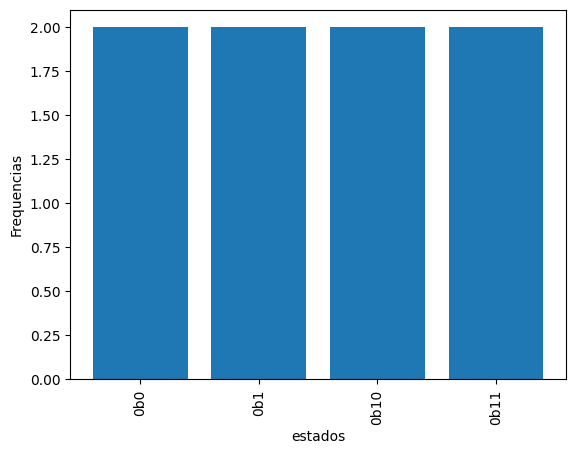

In [ ]:
s = [1,0]

n_qubits = len(s)
n_shots = 10

dev = qml.device("default.qubit", wires=n_qubits,shots=n_shots)

@qml.qnode(dev)
def segredo(n_qubits):
  for i in range(n_qubits):
        qml.Hadamard(wires=i)

  U = oraculo(s)
  qml.QubitUnitary(U, wires=range(n_qubits))

  return qml.probs(wires=range(n_qubits))

y = (n_qubits)
x = [str(bin(i)) for i in range(2**n_qubits)]

#----- circuito -----

dw = qml.draw(segredo)

#----- distribuição de estados ----
print("Cirucuito: \n")
print(dw(n_qubits))

print("Medidas: \n")
plt.bar(x,y)
plt.xticks(rotation = 90)
plt.xlabel("estados")
plt.ylabel("Frequencias")
plt.show()



1. Qual a função do método ``` QubitUnitary(U, wires=range(n_qubits))``` ?
2. Por que o circuito do operador mudança de fase é composto por várias portas de rotação e uma CNOT?
3. Rode para n_shots = 1, 10 e 100. Por que a distribuição de probabilidades dos estados é uniforme?
4. Qual a utilidade da mudança de fase na identificação da string do segredo? \\





#2.1 Amplificação de amplitude

Somente a inversão de fase não é sufuciente para, com algumas medidas, obtermos informação que possa distinguir o estado $|\vec{s}>$ dos outros estados. Portanto, vamos considerar um estado clássico na forma de um vetor dado por:

$V = \left [\begin{array}{cccc}
  53&38&17&23&79 \\
\end{array}\right ]^{t}$

Agora, vamos considerar a média dos elemntos do vetor $V$ dada por $a = 42$.
O próximo passo é calcular a distância entre cada elemento, $v$, do vetor em relação à média; logo, o primeiro elemnto com valor 53 está a $a-53=-11$ de distância da média. Se somarmos a média com essa diferença teremos $a + (a-53) = 31$. Repetindo o mesmo procedimento para cada um dos elemento do vetor $V$ por meio da equação:

$v^{'}=a + (a-v) = -v + 2a$

construiremos o vetor $V^{'}$ dado por:


$V^{'}=\left [\begin{array}{cccc}
  31&46&67&61&5 \\
\end{array}\right ]^{t}$

Desse modo, podemos generalizar vetorialmente considerando a matriz $A$:

$
A=\left [\begin{array}{cccc}
  \frac{1}{5}&\frac{1}{5}&\frac{1}{5}&\frac{1}{5}&\frac{1}{5} \\
  \frac{1}{5}&\frac{1}{5}&\frac{1}{5}&\frac{1}{5}&\frac{1}{5} \\
  \frac{1}{5}&\frac{1}{5}&\frac{1}{5}&\frac{1}{5}&\frac{1}{5} \\
  \frac{1}{5}&\frac{1}{5}&\frac{1}{5}&\frac{1}{5}&\frac{1}{5} \\
  \frac{1}{5}&\frac{1}{5}&\frac{1}{5}&\frac{1}{5}&\frac{1}{5} \\
\end{array}\right ]
$

Portanto,

$V^{'} = -V + 2\times AV = (-I+2A)V$


**Exercicio**: crie um algoritmo em python mostrando um grafico dos valores do vetor $V$ e do vetor $V^{'}$ no mesmo plano cartesiano. Não esqueça de colocar uma linha horizontal vermelha indicando a média. Deixe que o usuário entre com os 5 valores de ponto flutuante que desejar.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

c = 0
V = []

tam = int(input("Qual o tamanho do vetor V? \n"))

while c < tam:
  v = float(input(f"Digite o valor v{c}: "))
  V.append(v)
  c += 1

print(f"V = {V}")

def V_linha(v):

  a = 1/tam
  A = a*np.ones((tam,tam))
  v = np.array(v)
  print(A)
  print(v)
  return -v + 2*np.dot(A,v)

y1 = V
y2 = V_linha(V)

fig, ax = plt.subplots()
ax.scatter(range(0,tam),y1)
ax.scatter(range(0,tam),y2)
ax.set_ylabel('y')
ax.set_title('')
plt.axhline(y =sum(V)/tam , color = 'r', linestyle = '-')
plt.show()

O próximo passo é utilizar a estrutura lógica acima para o nosso caso onde um qubit possui $2^{n^{o} cbits}$ estados possíveis. Neste caso a matriz $A$ fica na forma:

$
A=\left [\begin{array}{cccc}
  \frac{1}{2^{n}}&\frac{1}{2^{n}}&\frac{1}{2^{n}}&\frac{1}{2^{n}}&... \\
  \frac{1}{2^{n}}&\frac{1}{2^{n}} &\frac{1}{2^{n}} &\frac{1}{2^{n}} &  \\
  \frac{1}{2^{n}}&\frac{1}{2^{n}} &... & &  \\
  \frac{1}{2^{n}}&\frac{1}{2^{n}} &... & &  \\
  \frac{1}{2^{n}}&\frac{1}{2^{n}}&\frac{1}{2^{n}}&\frac{1}{2^{n}}&... \\
\end{array}\right ]
$

[0.5 0.  0.5 0. ]


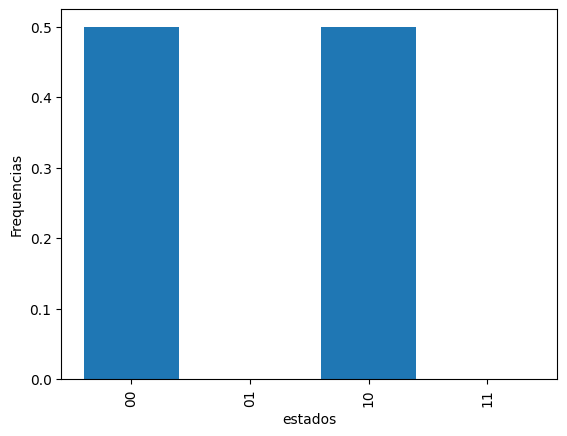

In [11]:
dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def superposicao():
  qml.Hadamard(wires=0)
  qml.PauliZ(wires=1)
  return qml.probs(wires=[0,1])



y = superposicao()

print(y)
